# music 01

![synthesizer](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.kidnepro.com%2Fmobile%2Farturia%2Fimages%2Fmoog-modular-v-sounds-mobile%2FMoogModular-1.jpg&f=1&nofb=1&ipt=7be8b44fc729536189f72f50b6307790219a9088428f78976487dd4297a17c6e&ipo=images)

Negli esempi "music" presenteremo la natura del segnale digitale usando l'audio di Colab. Nell'opzione Telecomunicazioni si tratta di qyesto ed altro!

## riferimenti

[1] "Simple Audio Processing in Python With Pydub" di Jamie Bullock [qui](https://betterprogramming.pub/simple-audio-processing-in-python-with-pydub-c3a217dabf11).  
[2] Audio Processing su YouTube [qui](https://www.youtube.com/watch?v=-mlIsOl_D_Q), un foglio CoLab [qui](https://colab.research.google.com/drive/1pkeMzy6g29pHtFmG1yltpOavGVdY0B60#scrollTo=Tl92AuZoYWCD).  
[3] PyDub [qui](https://github.com/jiaaro/pydub/), la nostra libreria audio.  
[4] IPython [qui](https://ipython.org/) per sfruttare al meglio CoLab, come ad esempio fargli suonare i file `wav`.  
[5] TinyUrl [qui](https://tinyurl.com/app) per gestirei link in modo semplice.  
[6] MatPlotLib [qui](https://matplotlib.org/stable/index.html).

## Installazione di pacchetti e librerie

Abbiamo bisogno di `ffmpeg` e lo installiamo come in Linux con `apt`, la libreria la installiamo con `pip`.

In [ ]:
!apt install ffmpeg # non necessario, già installato
!pip install pydub # necessario

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Veniamo al primo esempio: importiamo un file  `wav` e lo suoniamo (vedi [10).

In [ ]:
import urllib.request
import IPython # solo in CoLab
from pydub import AudioSegment
# from pydub.playback import play 

# file url request
urllib.request.urlretrieve("https://tinyurl.com/wx9amev", "metallic-drums.wav")
# crea un "segmento audio" dal file scaricato
loop = AudioSegment.from_wav("metallic-drums.wav")
# fuori da Colab si suona come segue
# play(loop) (not using CoLab)
# esportiamo il risultato (qui non servirebbe ma poi sarà utile)
loop.export("out.wav", format="wav")
# prepariamo il player in CoLab
IPython.display.Audio("out.wav")

Ora porcediamo alla sua analisi disegnand alcuni grafici.

- channels: 2 (1 = mono, 2 = stereo)
- sampling frequency: 44100 Hz (samples/seconds)
- sampling width: 16 bit
- numero campioni canale L: 88156 samples
- durata: 1.999 s


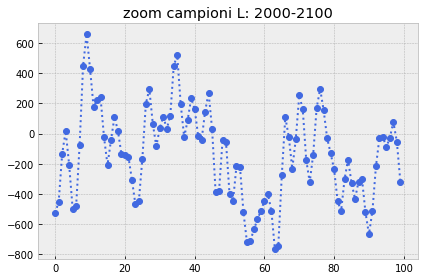

In [ ]:
import matplotlib.pyplot as plt

# ricava i campioni del segnale
audio_signal = loop.get_array_of_samples()
# otteniamo il numero dei canali audio
channels = loop.channels
# quanti campio abbiamo
channels_len = len(audio_signal)
# il canale sinistro ha i campioni dispari
channel_left = audio_signal[0::2]
# ... quello destro i pari
channel_right = audio_signal[1::2]
# la frequenza di campionamento, 44.1 KHz è il CD
frame_rate = loop.frame_rate
channel_left_len = len(channel_left)
# bit per campione per conoscere i livelli dell'informazione sonora (quantizzazione)
sample_width = loop.sample_width * 8
# la durata in sec. del file audio
duration = loop.duration_seconds
print(f'- channels: {channels} (1 = mono, 2 = stereo)')
print(f'- sampling frequency: {frame_rate} Hz (samples/seconds)')
print(f'- sampling width: {sample_width} bit')
print(f'- numero campioni canale L: {channel_left_len} samples')
print(f'- durata: {duration:.3f} s')
# i grafici
plt.style.use('bmh')
plt.plot(channel_left, color="royalblue")
plt.plot(channel_right, color="tomato")
plt.tight_layout()
plt.title('L and R channels')
plt.show()
plt.plot(channel_left[2000:2100], 'o:r', color = "royalblue")
# plt.scatter(channel_left[2000:2100], [*range(0,100)])
plt.title('zoom campioni L: 2000-2100')
plt.tight_layout()
plt.show()

I **campioni** (*sample* in inglese) sono individuati dai pallini, la parte tratteggiata li collega ma non fa parte del segnale! 